In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the 'bostonhousing_ord' dataset by using pandas library

BHdata = pd.read_csv(r"D:\iiit notes\Internship\16 season 2 jun-2021\bostonhousing_ord.csv", header = 0)
BHdata.head()

,response,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,1,1.25179,0.0,8.14,0,0.538,5.570,98.1,3.7979,4,307,21.0,376.57,21.02
1,1,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307,21.0,303.42,16.51
2,1,1.13081,0.0,8.14,0,0.538,5.713,94.1,4.2330,4,307,21.0,360.17,22.60
3,1,1.38799,0.0,8.14,0,0.538,5.950,82.0,3.9900,4,307,21.0,232.60,27.71
4,1,1.15172,0.0,8.14,0,0.538,5.701,95.0,3.7872,4,307,21.0,358.77,18.35


In [3]:
# Display the dataset information 

BHdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   response  506 non-null    int64  
 1   V1        506 non-null    float64
 2   V2        506 non-null    float64
 3   V3        506 non-null    float64
 4   V4        506 non-null    int64  
 5   V5        506 non-null    float64
 6   V6        506 non-null    float64
 7   V7        506 non-null    float64
 8   V8        506 non-null    float64
 9   V9        506 non-null    int64  
 10  V10       506 non-null    int64  
 11  V11       506 non-null    float64
 12  V12       506 non-null    float64
 13  V13       506 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


In [4]:
# Display the unique values for each varaiable

BHdata.nunique()

response      5
V1          504
V2           26
V3           76
V4            2
V5           81
V6          446
V7          356
V8          412
V9            9
V10          66
V11          46
V12         357
V13         455
dtype: int64

In [5]:
# Display all values in the columns

for i in BHdata.columns:
    print(BHdata[i].value_counts())

2    239
3    123
1     77
4     36
5     31
Name: response, dtype: int64
0.01501     2
14.33370    2
0.57834     1
0.97617     1
2.14918     1
           ..
0.51183     1
0.08221     1
0.05302     1
0.25356     1
8.24809     1
Name: V1, Length: 504, dtype: int64
0.0      372
20.0      21
80.0      15
12.5      10
25.0      10
22.0      10
40.0       7
30.0       6
45.0       6
90.0       5
95.0       4
21.0       4
60.0       4
33.0       4
28.0       3
52.5       3
75.0       3
34.0       3
35.0       3
70.0       3
55.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: V2, dtype: int64
18.10    132
19.58     30
8.14      22
6.20      18
21.89     15
        ... 
4.15       1
1.76       1
1.38       1
2.01       1
1.89       1
Name: V3, Length: 76, dtype: int64
0    471
1     35
Name: V4, dtype: int64
0.538    23
0.713    18
0.437    17
0.871    16
0.489    15
         ..
0.394     1
0.518     1
0.435     1
0.385     1
0.422     1
Name: V5, Length: 81, dt

In [6]:
# Identify the Target and Independent variable

IndepVar = []

for col in BHdata.columns:
    if col != 'response':
        IndepVar.append(col)
        
TargetVar = 'response'

x = BHdata[IndepVar]
y = BHdata[TargetVar]

In [7]:
# Split the dataset into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Multiple logistic regression

In [8]:
# To build the 'Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression 
BHdataLR = LogisticRegression(multi_class='multinomial', penalty='none', solver='newton-cg', random_state=0) 
BHdataLR = BHdataLR.fit(x_train,y_train)

In [9]:
# Predict the model with test data

y_pred = BHdataLR.predict(x_test)

In [10]:
# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Vertical is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred

# Class = Label 0-4

lst_classes = [1, 2, 3, 4, 5]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fp = arr_data[0][1]
    tn = arr_data[0][0]
    fn = arr_data[1][0]

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    m = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(m), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);

    print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp, fp, tn, fn));
    print("Accuracy: {0}".format(accuracy)); # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient

[[14  4  0  0  0]
 [15 44 15  1  0]
 [ 0  9 24  3  1]
 [ 0  0  2  7  3]
 [ 1  0  0  3  6]]
Print Class: 0
TP=14, FP=4, TN=118, FN=16
Accuracy: 0.868
Precision: 0.778
Sensitivity: 0.467
F1-Score: 0.583
Specificity: 0.967
Balanced Accuracy: 0.717
MCC: 0.534

Print Class: 1
TP=44, FP=31, TN=64, FN=13
Accuracy: 0.711
Precision: 0.587
Sensitivity: 0.772
F1-Score: 0.667
Specificity: 0.674
Balanced Accuracy: 0.723
MCC: 0.432

Print Class: 2
TP=24, FP=13, TN=98, FN=17
Accuracy: 0.803
Precision: 0.649
Sensitivity: 0.585
F1-Score: 0.615
Specificity: 0.883
Balanced Accuracy: 0.734
MCC: 0.484

Print Class: 3
TP=7, FP=5, TN=133, FN=7
Accuracy: 0.921
Precision: 0.583
Sensitivity: 0.5
F1-Score: 0.538
Specificity: 0.964
Balanced Accuracy: 0.732
MCC: 0.497

Print Class: 4
TP=6, FP=4, TN=138, FN=4
Accuracy: 0.947
Precision: 0.6
Sensitivity: 0.6
F1-Score: 0.6
Specificity: 0.972
Balanced Accuracy: 0.786
MCC: 0.572



In [11]:
# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean()

from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)));

Overall Performance Prediction:
Accuracy: 85.0%
Precision: 63.94%
Recall or Sensitivity: 58.48%
F1-Score: 0.6006
Specificity or True Nagative Rate: 89.2%
Balanced Accuracy: 73.84%

MCC: 0.5038



In [12]:
# Fit OneVsRestClassifier model to calculate the ROC SUC and plot ROC curve

from sklearn.multiclass import OneVsRestClassifier

modelORC = OneVsRestClassifier(LogisticRegression())
modelORC.fit(x_train, y_train)
y1_pred = modelORC.predict(x_test)
y1_pred_proba = modelORC.predict_proba(x_test)
print(y1_pred_proba)

[[2.15982578e-01 7.39126157e-01 4.48746981e-02 1.65461435e-05
  2.06459523e-08]
 [3.26701953e-01 5.82307333e-01 9.09668741e-02 3.47702858e-07
  2.34915681e-05]
 [6.55589637e-06 3.32530589e-01 6.13955598e-01 4.43971249e-02
  9.11013206e-03]
 [5.25861891e-01 4.53104790e-01 2.10332834e-02 2.39149086e-08
  1.10399785e-08]
 [2.89850862e-06 9.28964599e-02 4.10889927e-01 1.66638862e-01
  3.29571853e-01]
 [2.34351778e-03 7.43953513e-01 2.39512147e-01 1.39780902e-02
  2.12732130e-04]
 [2.84265612e-04 2.78501020e-01 2.88281818e-01 3.37969133e-01
  9.49637633e-02]
 [3.03157592e-02 8.09467670e-01 1.52555395e-01 7.64648441e-03
  1.46916960e-05]
 [6.38060050e-06 1.53220583e-01 6.42737934e-01 5.66843236e-02
  1.47350779e-01]
 [2.79280076e-11 8.42034485e-04 2.47847054e-01 4.04810369e-01
  3.46500543e-01]
 [4.30017324e-03 5.69472029e-01 3.80604945e-01 2.31921570e-02
  2.24306954e-02]
 [4.56753193e-01 5.30613442e-01 1.26327855e-02 5.79169144e-07
  1.62889285e-11]
 [1.02586357e-02 6.97531290e-01 2.838745

In [13]:
# ROC AUC SCORE
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

ROC_AUC_Score = roc_auc_score(y_test, y1_pred_proba, multi_class='ovr', average='weighted')
print('ROC Score: ', round(ROC_AUC_Score, 3))

ROC Score:  0.867


# Decision Tree


In [14]:
# To build the decision tree model with random sampling

from sklearn.tree import DecisionTreeClassifier

BHdataDR = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
max_depth=3, max_features=None, max_leaf_nodes=None,
min_impurity_decrease=0.0, min_impurity_split=None,
min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0,
random_state=None, splitter='best')

BHdataDR = BHdataDR.fit(x_train,y_train)

In [15]:
# Display all Algorithm parameters

params1 = BHdataDR.get_params()
print(params1)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [16]:
# Predict the model with test data

y1_pred = BHdataDR.predict(x_test)

In [17]:
# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Vertical is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y1_pred

# Class = Label 0-4

lst_classes = [1, 2, 3, 4, 5]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fp = arr_data[0][1]
    tn = arr_data[0][0]
    fn = arr_data[1][0]

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    m = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(m), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);

    print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp, fp, tn, fn));
    print("Accuracy: {0}".format(accuracy)); # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient

[[14  4  0  0  0]
 [15 44 15  1  0]
 [ 0  9 24  3  1]
 [ 0  0  2  7  3]
 [ 1  0  0  3  6]]
Print Class: 0
TP=17, FP=4, TN=118, FN=13
Accuracy: 0.888
Precision: 0.81
Sensitivity: 0.567
F1-Score: 0.667
Specificity: 0.967
Balanced Accuracy: 0.767
MCC: 0.616

Print Class: 1
TP=45, FP=32, TN=63, FN=12
Accuracy: 0.711
Precision: 0.584
Sensitivity: 0.789
F1-Score: 0.672
Specificity: 0.663
Balanced Accuracy: 0.726
MCC: 0.438

Print Class: 2
TP=22, FP=10, TN=101, FN=19
Accuracy: 0.809
Precision: 0.688
Sensitivity: 0.537
F1-Score: 0.603
Specificity: 0.91
Balanced Accuracy: 0.724
MCC: 0.486

Print Class: 3
TP=11, FP=4, TN=134, FN=3
Accuracy: 0.954
Precision: 0.733
Sensitivity: 0.786
F1-Score: 0.759
Specificity: 0.971
Balanced Accuracy: 0.879
MCC: 0.734

Print Class: 4
TP=7, FP=0, TN=142, FN=3
Accuracy: 0.98
Precision: 1.0
Sensitivity: 0.7
F1-Score: 0.824
Specificity: 1.0
Balanced Accuracy: 0.85
MCC: 0.828



In [18]:
# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean()

from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)));

Overall Performance Prediction:
Accuracy: 86.84%
Precision: 76.3%
Recall or Sensitivity: 67.58%
F1-Score: 0.705
Specificity or True Nagative Rate: 90.22%
Balanced Accuracy: 78.92%

MCC: 0.6204



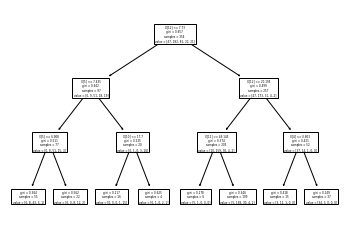

In [19]:
from sklearn import tree

tree.plot_tree(BHdataDR);

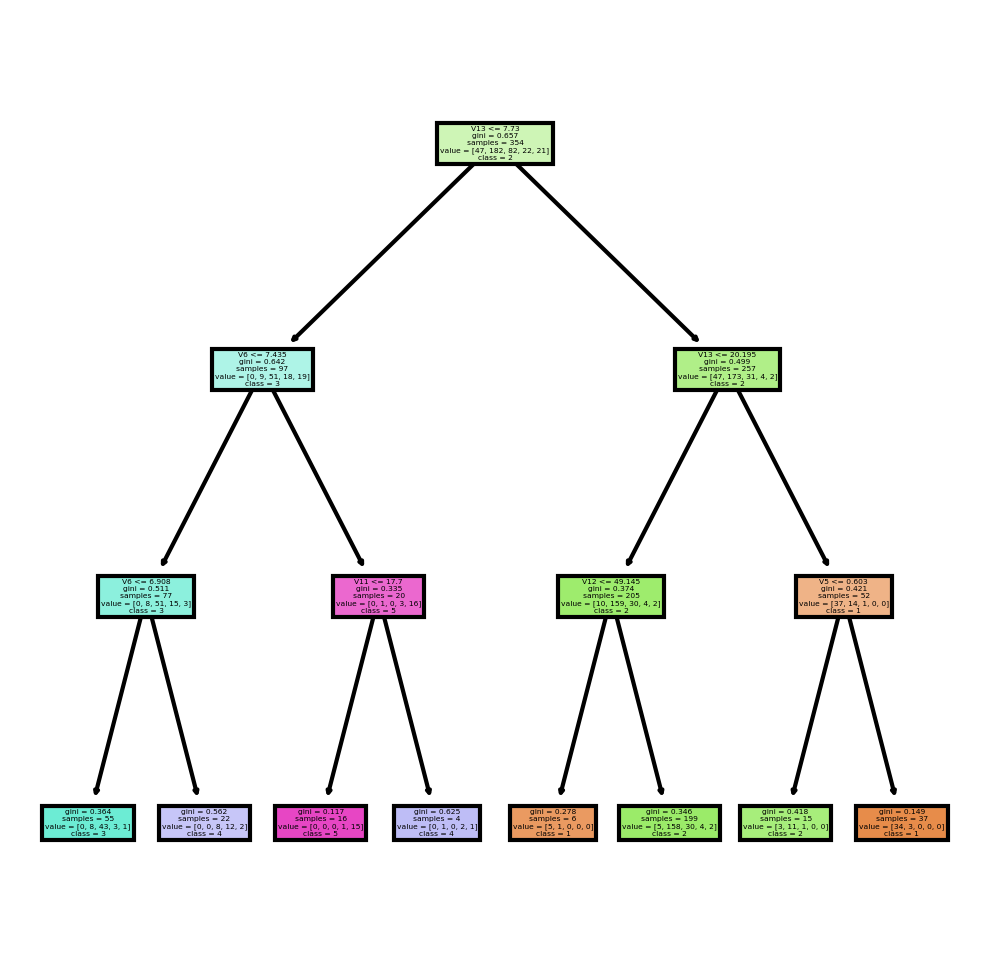

In [20]:
fn=['V1','V2','V3','V4', 'V5', 'V6', 'V7', 'V8','V9','V10','V11','V12','V13']
cn=['1', '2', '3', '4', '5']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(BHdataDR, feature_names = fn, class_names=cn, filled = True);
fig.savefig('BHdataDR.png')